### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'Saccharose hydrolysis'

In [4]:
integrals_path = '../../mnova_integrals/calki_better_baseline.csv'

reagents_names = ['saccharose', 'alpha-glucose','beta-glucose', 'fructose']

integrals_separator = '\t'

output_path = '../../mnova_integrals/'

#### Mixture in time

In [5]:
integrals = pd.read_csv(integrals_path, sep = integrals_separator).iloc[:,[1,3,5,7]]
integrals.fillna(0., inplace=True)
integrals.columns = ['saccharose', 'alpha-glucose', 'beta-glucose', 'fructose']

In [6]:
integrals[integrals < 0] = 0

In [7]:
integrals

,saccharose,alpha-glucose,beta-glucose,fructose
0,50.93800,0.056052,0.008912,0.053207
1,50.88760,0.081185,0.010048,0.113395
2,50.83320,0.103627,0.009586,0.118683
3,50.95250,0.123608,0.009394,0.120440
4,50.86830,0.129540,0.009982,0.143952
...,...,...,...,...
1018,9.63685,4.015500,1.292990,20.481900
1019,9.18937,3.721350,1.206830,24.095000
1020,10.08660,4.146410,1.323030,21.367800
1021,9.26886,3.901810,1.276830,19.683100


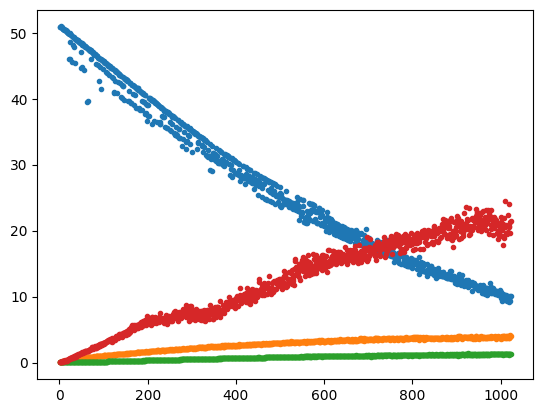

In [8]:
for i in range(integrals.shape[1]):
    plt.plot(range(1,1024), integrals.iloc[:,i], '.')

### Saving preprocessed spectra

In [9]:
integrals.to_csv(output_path + 'sacharoza_calki_nowe.csv', '\t', index=False)